In [2]:
from kaggle_environments import make
import numpy as np
import gym
import torch
from Scripts.MCTS import agent_mcts
from Scripts.Deep_Q_Learning import DQN
import matplotlib.pyplot as plt
from Scripts.training import train_agent,load_agent
from Scripts.test_model import test_agent
from tqdm import tqdm

# 0. Initialisating the environment

In [3]:
cols = 7
rows = 6
env = make("connectx", configuration={"rows":rows, "columns":cols})
SAVE_MODEL = True
LOAD_MODEL_agent1 = False
LOAD_MODEL_agent2 = False


In [4]:
if(LOAD_MODEL_agent1):
    PATH_TO_LOAD = ""
    agent1 = load_agent(PATH_TO_LOAD)
if(LOAD_MODEL_agent2):
    PATH_TO_LOAD = ""
    agent2 = load_agent(PATH_TO_LOAD)

# 1. Training against Random

In [5]:
RANDOM_EPOCHS = 1

In [6]:
agent1 = DQN()
agent2 = DQN()
agent1 = train_agent(env,agent1,"random",n_player=1,epoch=RANDOM_EPOCHS,display_info=False)
agent2 = train_agent(env,agent2,"random",n_player=2,epoch=RANDOM_EPOCHS,display_info=False)


In [7]:
def create_agent_against(agent):
    def dqn_agent(obs,config):
        agent_b =DQN()
        agent_b.network = agent.network
        return agent.choose_action(obs,test_agent = True)
    return dqn_agent

In [ ]:
TRAINING_EPOCHS = 10
NB_GAMES_TEST = 100
NB_SWITCH = 80

In [36]:
history_random = []
history_MCTS = []
history_negamax = []

for i in tqdm(range(NB_SWITCH)):
    agent1 = train_agent(env,agent1,create_agent_against(agent2),n_player=1,epoch=TRAINING_EPOCHS,display_info=False)
    agent2 = train_agent(env,agent1,create_agent_against(agent1),n_player=2,epoch=TRAINING_EPOCHS,display_info=False)
    current_history_random = test_agent(env,agent1,"random",n_player=1,nb_games=NB_GAMES_TEST)
    current_history_MCTS = test_agent(env,agent1,agent_mcts,n_player=1,nb_games=NB_GAMES_TEST)
    current_history_negamax = test_agent(env,agent1,"negamax",n_player =1, nb_games=NB_GAMES_TEST)
    
    history_random.append(current_history_random[1]/NB_GAMES_TEST*100)
    history_MCTS.append(current_history_MCTS[1]/NB_GAMES_TEST*100)
    history_negamax.append(current_history_negamax[1]/NB_GAMES_TEST*100)

    

 56%|█████▋    | 45/80 [2:53:00<2:14:33, 230.67s/it]


KeyboardInterrupt: 

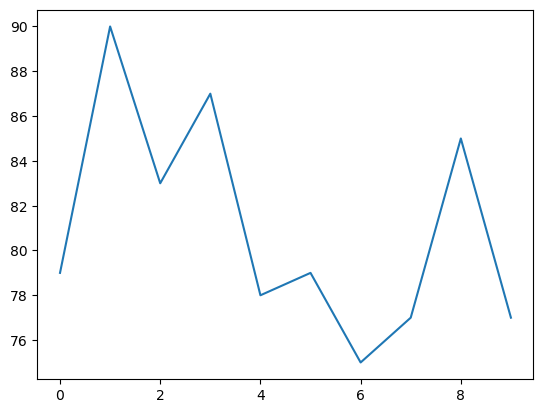

In [27]:
plt.plot(history_random)

# 2. Testing the agents

In [5]:
history = test_agent(env,agent1,"random",n_player=1,nb_games=100)

In [7]:
history = []

# 3. Testing efficiency of the training against rd

/Users/axelnavarro/Documents/3A/P2/INF581/Reinforced-Connect4/Scripts/Deep_Q_Learning.py:114: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(observation).float().detach()
/Users/axelnavarro/Documents/3A/P2/INF581/Reinforced-Connect4/Scripts/training.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(state).float()


{1: 88, -1: 12, None: 0, 0: 0}
{1: 87, -1: 13, None: 0, 0: 0}
{1: 83, -1: 16, None: 0, 0: 1}
{1: 90, -1: 10, None: 0, 0: 0}
{1: 90, -1: 10, None: 0, 0: 0}
{1: 88, -1: 12, None: 0, 0: 0}
{1: 87, -1: 13, None: 0, 0: 0}
{1: 92, -1: 8, None: 0, 0: 0}
{1: 86, -1: 14, None: 0, 0: 0}
{1: 89, -1: 11, None: 0, 0: 0}
{1: 89, -1: 11, None: 0, 0: 0}
{1: 93, -1: 7, None: 0, 0: 0}
{1: 89, -1: 11, None: 0, 0: 0}
{1: 94, -1: 6, None: 0, 0: 0}
{1: 85, -1: 15, None: 0, 0: 0}
{1: 86, -1: 14, None: 0, 0: 0}
{1: 87, -1: 13, None: 0, 0: 0}
{1: 90, -1: 10, None: 0, 0: 0}
{1: 91, -1: 9, None: 0, 0: 0}
{1: 89, -1: 11, None: 0, 0: 0}
{1: 91, -1: 9, None: 0, 0: 0}
{1: 91, -1: 9, None: 0, 0: 0}
{1: 96, -1: 4, None: 0, 0: 0}
{1: 93, -1: 7, None: 0, 0: 0}
{1: 84, -1: 16, None: 0, 0: 0}
{1: 94, -1: 6, None: 0, 0: 0}
{1: 91, -1: 9, None: 0, 0: 0}
{1: 94, -1: 6, None: 0, 0: 0}
{1: 93, -1: 7, None: 0, 0: 0}
{1: 94, -1: 6, None: 0, 0: 0}
{1: 92, -1: 8, None: 0, 0: 0}
{1: 96, -1: 4, None: 0, 0: 0}
{1: 97, -1: 3, None: 0,

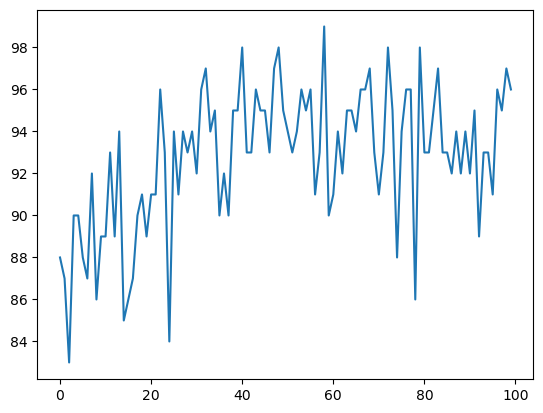

In [9]:
agent1 = DQN()
nb_games_test = 100
for i in range(100):
    agent1 = train_agent(env,agent1,"random",n_player=1,epoch=100,display_info=False)
    current_history = test_agent(env,agent1,"random",n_player=1,nb_games=nb_games_test)
    print(current_history)
    history.append(current_history[1]/nb_games_test * 100)
plt.plot(history)

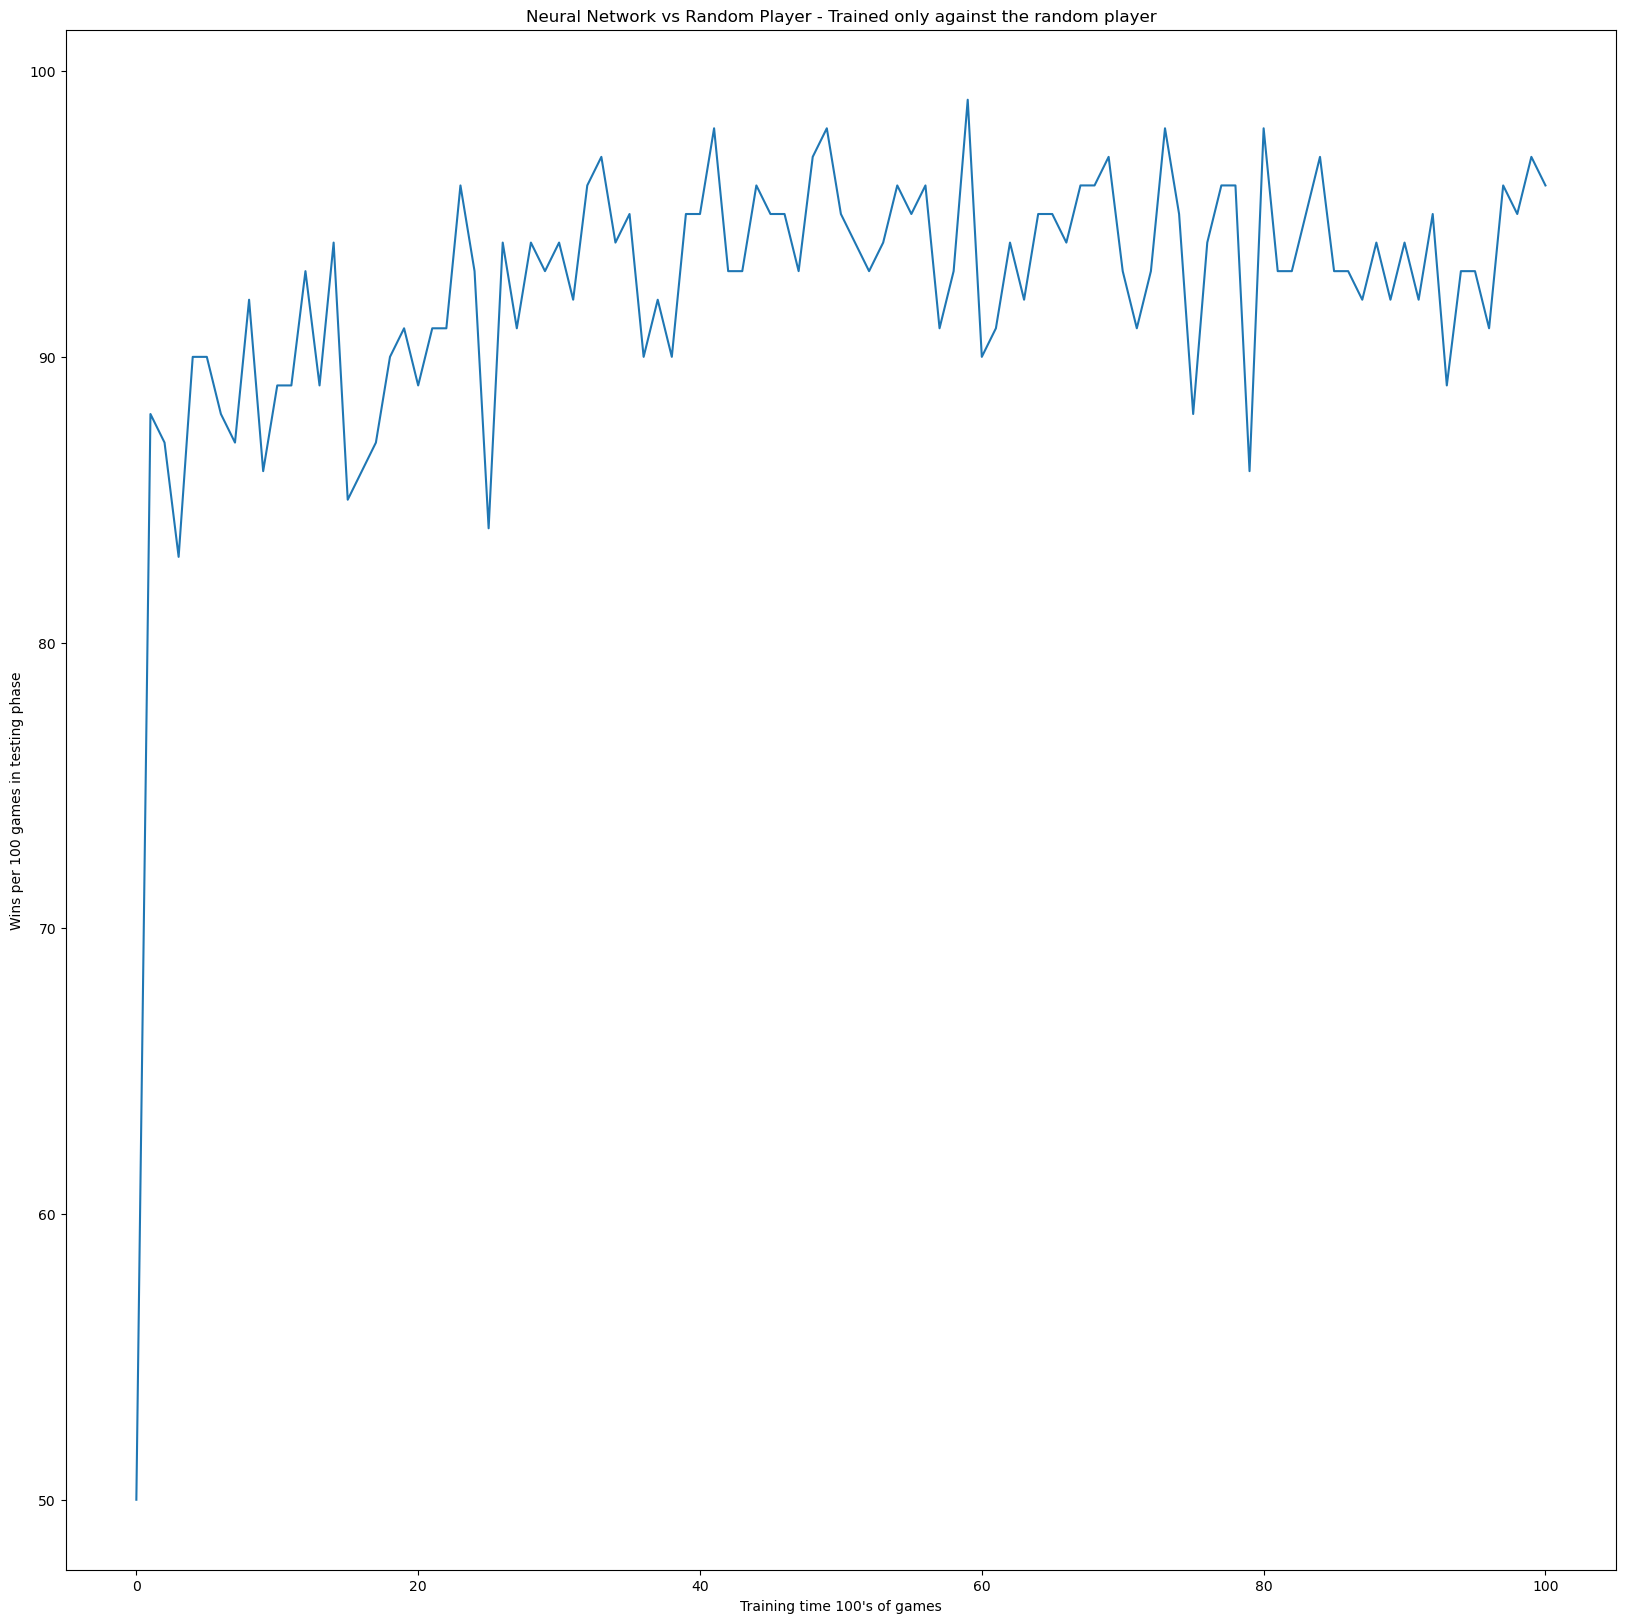

In [35]:
plt.figure(figsize = (20,20))
plt.title("Neural Network vs Random Player - Trained only against the random player")
plt.xlabel("Training time 100's of games")
plt.ylabel("Wins per 100 games in testing phase")
history.insert(0,50)
plt.plot(history)

In [15]:
def create_agent_against(agent):
    def dqn_agent(obs,config):
        agent_b =DQN()
        agent_b.network = agent.network
        return agent.choose_action(obs,test_agent = True)
    return dqn_agent

In [13]:
train_agent(env,agent1,create_agent_against(agent1),epoch = 100)

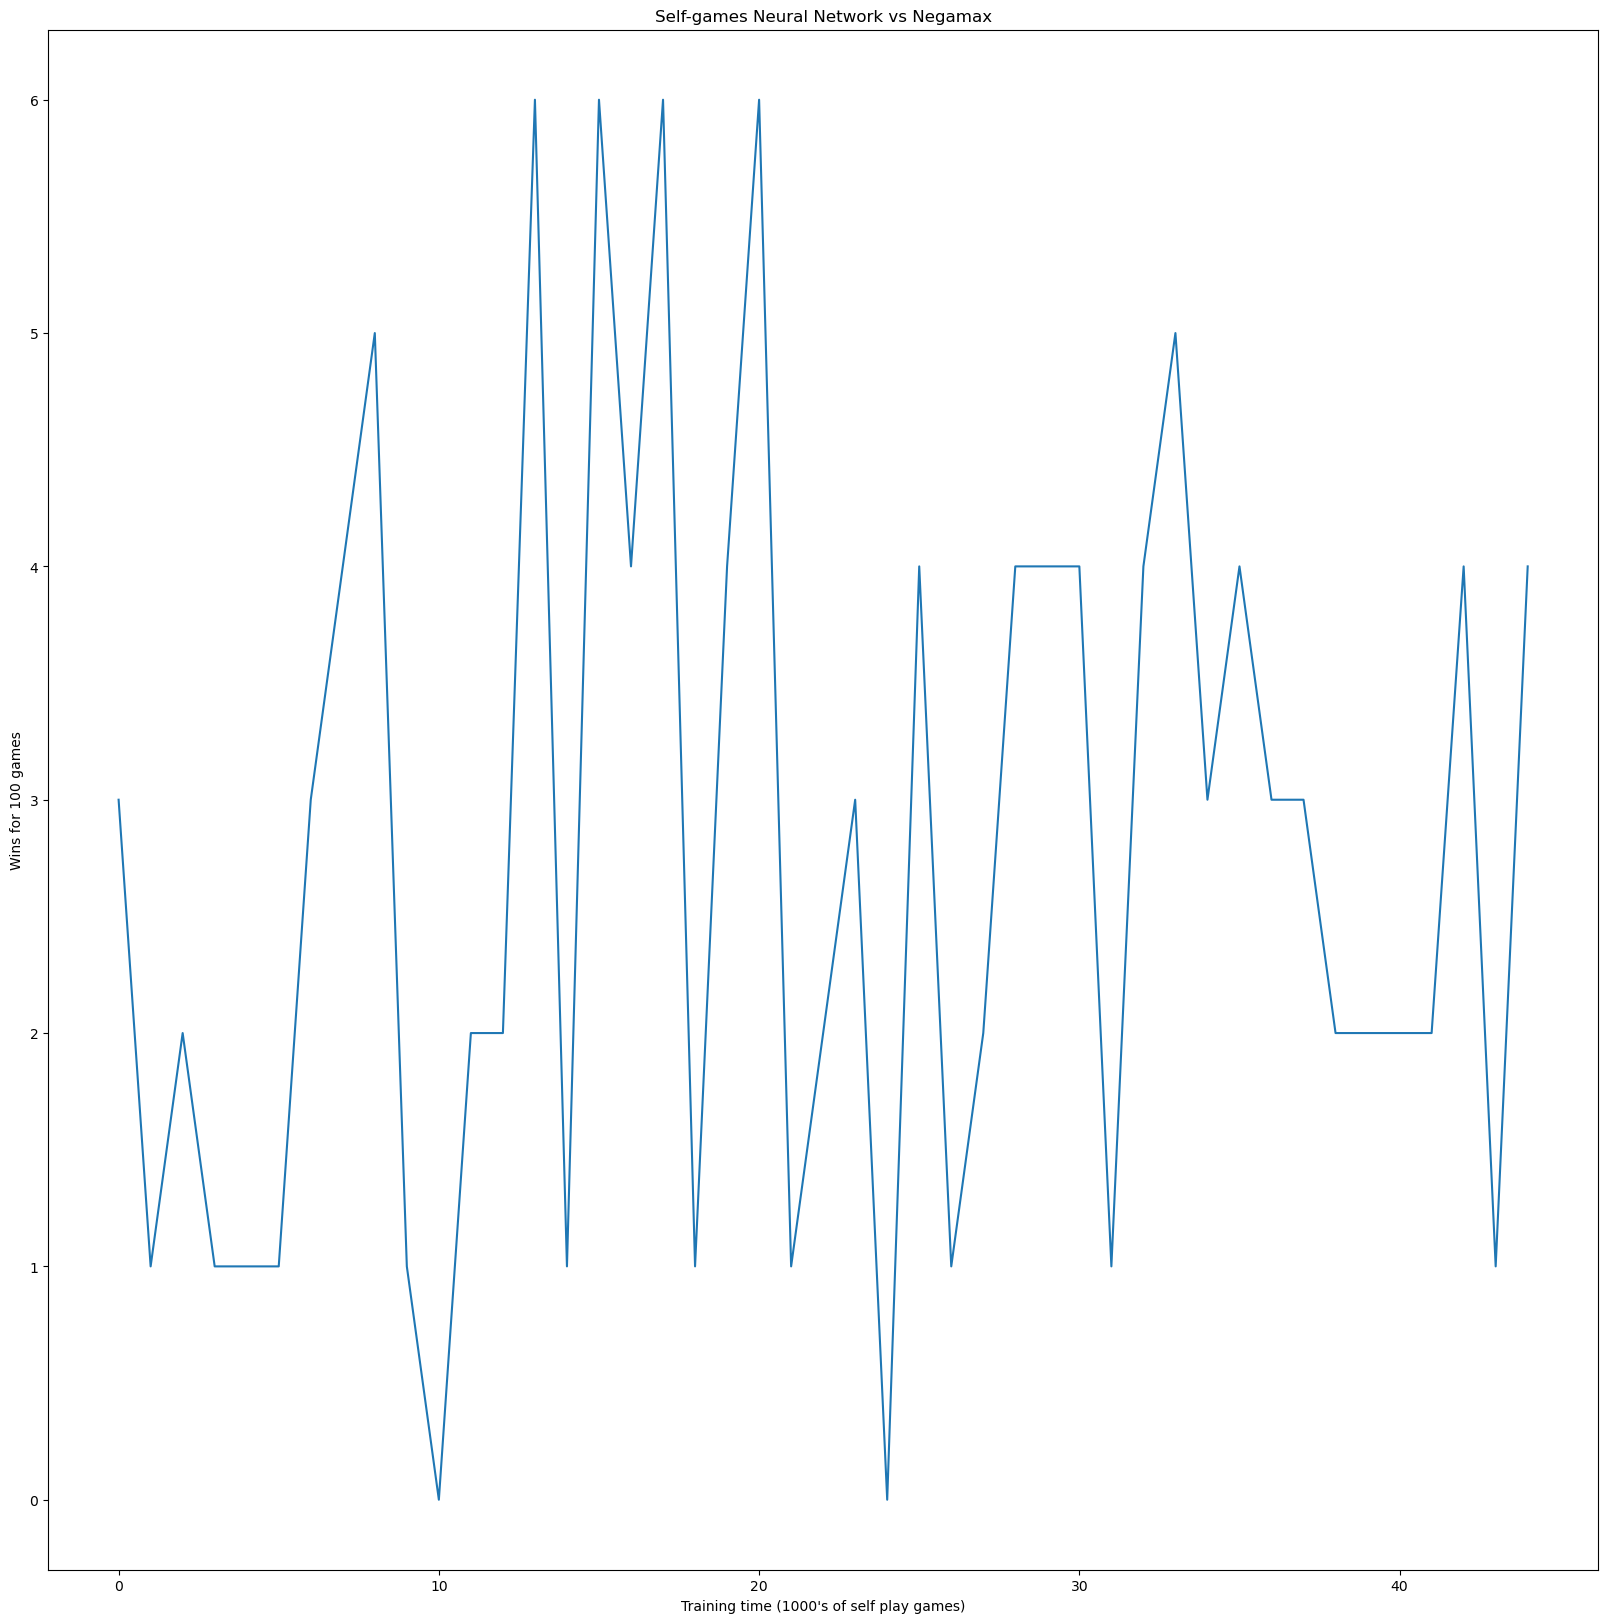

In [44]:
plt.figure(figsize=(20,20))
plt.xlabel("Training time (1000's of self play games)")
plt.ylabel("Wins for 100 games")

plt.title("Self-games Neural Network vs Negamax")
plt.plot(history_negamax)

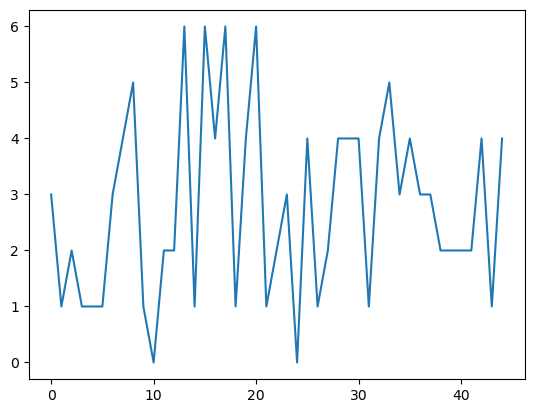

In [39]:
plt.plot(history_negamax)